# PROYECTO 2. INTRODUCCIÓN AL ANÁLISIS DE DATOS
## Emtech Institute
**Tutor: Jaime Saúl Alonso Sánchez**

**Alumno: Jorge Armando Rodríguez González**

**Repositorio:** https://github.com/JergeRG/Proyecto-2

# Introducción

A continuación se va a realizar un análisis de los datos de las importaciones y exportaciones de la empresa  **Synergy Logistics**, esto con el fin de generar una base para la estructuración operativa.

Para plantear la estructuración se van a  atender las solicitudes que la empresa quiere conocer: 
1. Rutas de importación y exportación.
2. Medio de transporte utilizado.
3. Valor total de importaciones y exportaciones.


El análisis tiene el fin de poner a prueba y validar los conocimientos obtenidos durante el curso **Introducción a la programación**, además de dar opciones al final del análisis con base en los datos para la estrategia que quiere implementar la empresa. 


# Análisis

En esta sección es donde se realiza el análisi de los datos, se muestran graficas y se resaltan los puntos más importantes respecto a las solicitudes que hizo la empresa.

## 0. Preparación del entorno y carga de datos 

En este punto, debemos comenzar por importar los paquetes que se utilizarán para el análisis.

Importamos el paquete de `pandas` en la variable `pd`, el cuál nos va a ayudar a realizar el análisis de los datos, por otra parte, importamos paquete 	`seaborn` en la variable `sns`, para realizar gráficas que nos ayuden a compreder mejor los datos. Por último, importamos `pyplot` del paquete `matplotlib` para darle formato a nuestras graficas.

También comenzamos por cargar los datos de nuestro conjunto a tráves de la función 	`pd.read_csv()`.

Para comenzar el análisis, debemos ver el como está estructurado nuestro conjunto, por lo que msotamos una parte de nuestro conjunto.

In [8]:
# Importamos paquetes
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

# Abrimos el archivo, especificando la ruta y usando pd.read_csv()
synergyFile = 'data/synergy_logistics_database.csv'
synergyDataFrame = pd.read_csv(synergyFile, index_col='register_id')

# Visualizamos una parte del conjunto
synergyDataFrame.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


## 1. Rutas de importación y exportación

Para este punto se nos solicita1 identificar las 10 rutas más demandadas. Acorde a los flujos de importación y exportación, con el fin de veridicar si a la empresa le es conveniete enfocar sus esfuerzos en ellas.

Según lo visto en el conjunto de datos, se pueden definir las rutas por `direction`, ya que las rutas de exportación e importación son diferentes según el caso. También se debe contemplar `origin` y `destination`, ya que estos dos parámetro definen como tal la ruta que se sigue para la importación o la exportación. 
Por último, se debe contemplar el `transport_mode` para definir la ruta, ya que la ruta también depende del medio de transporte.

Así que, se toman las columnas antes mencionadas junto con `total_value` y se almacenan dentro de otro DataFrame.

In [20]:
# Tomamos las columnas 'direction', 'origin', 'destination' y  'transport_mode' del DataFrame original
rutasUnicas = synergyDataFrame[['direction', 'origin', 'destination', 'transport_mode', 'total_value']] 

# Visualizamos una parte de los datos del nuevo DataFrame
rutasUnicas.head(15)

,direction,origin,destination,transport_mode,total_value
register_id,,,,,
1,Exports,Japan,China,Sea,33000000
2,Exports,Japan,China,Sea,16000000
3,Exports,Japan,China,Sea,29000000
4,Exports,Japan,China,Sea,14000000
5,Exports,Japan,China,Sea,17000000
6,Exports,Japan,China,Sea,20000000
7,Exports,Japan,China,Sea,27000000
8,Exports,Japan,China,Sea,33000000
9,Exports,Japan,USA,Air,15000000


Una vez que tengamos el nuevo DataFrame, lo agrupamos por `direction`, `origin`, `destination` y `transport_mode`, ya que estos son los parámetros que definen a nuestra ruta, esto con el fin de utilizar la función `count()`,la cuál cuneta las veces que se ha utilizado la ruta para exportaciones o importaciones.

También ordenamos el DataFrame, para coservar en la parte superior de esté a las rutas que tengan mayor flujo de importaciones o exportaciones.

In [21]:
# Se agrupa nuestro DataFrame
rutasUnicas = rutasUnicas.groupby(['direction', 'origin','destination', 'transport_mode']).count()

# Ordenamos de forma ascendente el DataFrame
rutasUnicas = rutasUnicas.sort_values(by = 'total_value', ascending=False)

# Visualizamos una parte de los datos
rutasUnicas.head(15)

total_value
direction origin         destination          transport_mode             
Exports   South Korea    Vietnam              Sea                     497
          USA            Netherlands          Sea                     436
          Netherlands    Belgium              Road                    374
          China          Mexico               Air                     330
          Japan          Brazil               Sea                     306
          Germany        France               Road                    299
          South Korea    Japan                Sea                     279
Imports   Singapore      Thailand             Sea                     273
Exports   Australia      Singapore            Sea                     273
          Canada         Mexico               Rail                    261
          China          Spain                Air                     250
          Mexico         New Zealand          Sea                     249
Imports   Germany        China                Sea                     233
Exports   United Kingdom Belgium              Sea                     229
          India          United Arab Emirates Sea                     214

A partir de aqui, hacemos la sepración por importaciones y exportaciones, esto generando dos DataFrames a partir de `rutasUnicas` y gracias a que `direction` es un índice.

Esto lo vamos a hacer tomando solo las 10 primeras rutas para cada caso, ya que, al haber ordenado el DataFrame `rutasUnicas` de forma desecedente, estamos tomando las 10 rutas con más flujo para las exportacione y 10 rutas con más flujo para las importaciones.

In [22]:
# Tomamos las 10 rutas con más flujo para las exportaciones
rutasExportaciones = rutasUnicas.xs('Exports').head(10)

# Tomamos las 10 rutas con más flujo para las importaciones
rutasImportaciones = rutasUnicas.xs('Imports').head(10)

#Visualizamos los datos 
rutasImportaciones.head()

,,,total_value
origin,destination,transport_mode,
Singapore,Thailand,Sea,273
Germany,China,Sea,233
China,Japan,Air,210
Japan,Mexico,Sea,206
Malaysia,Thailand,Rail,195


Luego, le damos un poco de formato a los  DataFrame, puesto que, `origin`, `destination` y `transport_mode`, van a componer el nombre de cada ruta, formamos una nueva columna compuesta por estos parametros.

Y también, cambiamos el nombre de la columna de `total_value` a `count` para este más acorde a lo que la columna representa.

In [23]:
# Crea la columna 'route' para el DataFrame de las Exportaciones
rutasExportaciones['route'] = rutasExportaciones.index.to_list()

# Crea la columna 'route' para el DataFrame de las Importaciones
rutasImportaciones['route'] = rutasImportaciones.index.to_list()

# Cambia la columna 'total_value' a 'count' para el DataFrame de las Exportaciones
rutasExportaciones = rutasExportaciones.rename(columns = {'total_value': 'count'})

# Cambia la columna 'total_value' a 'count' para el DataFrame de las Importaciones
rutasImportaciones = rutasImportaciones.rename(columns = {'total_value': 'count'})

#visualizamos los datos
rutasImportaciones

,,,count,route
origin,destination,transport_mode,,
Singapore,Thailand,Sea,273,"(Singapore, Thailand, Sea)"
Germany,China,Sea,233,"(Germany, China, Sea)"
China,Japan,Air,210,"(China, Japan, Air)"
Japan,Mexico,Sea,206,"(Japan, Mexico, Sea)"
Malaysia,Thailand,Rail,195,"(Malaysia, Thailand, Rail)"
China,Thailand,Road,145,"(China, Thailand, Road)"
Spain,Germany,Road,142,"(Spain, Germany, Road)"
China,United Arab Emirates,Sea,114,"(China, United Arab Emirates, Sea)"
Brazil,China,Sea,113,"(Brazil, China, Sea)"


Para terminar de darle formato a los DataFrame, modificamos el nombre de la columna `route`, para que deje de ser una lista.

In [24]:
# Función que le dará formato a route
def modificar_route(lista):
    nombre  = f'{lista[0]} - {lista[1]}\n{lista[2]}'
    return nombre

# Se le da formato a la columna 'route' de el DataFrame de las Exportaciones
rutasExportaciones['route'] = rutasExportaciones['route'].apply(modificar_route)

# Se le da formato a la columna 'route' de el DataFrame de las Importaciones
rutasImportaciones['route'] = rutasImportaciones['route'].apply(modificar_route)

# Visualizamos los datos
rutasImportaciones.head()

,,,count,route
origin,destination,transport_mode,,
Singapore,Thailand,Sea,273,Singapore - Thailand\nSea
Germany,China,Sea,233,Germany - China\nSea
China,Japan,Air,210,China - Japan\nAir
Japan,Mexico,Sea,206,Japan - Mexico\nSea
Malaysia,Thailand,Rail,195,Malaysia - Thailand\nRail


Para finalizar, gráficamos los datos de las rutas con más flujo para las **importaciones**.

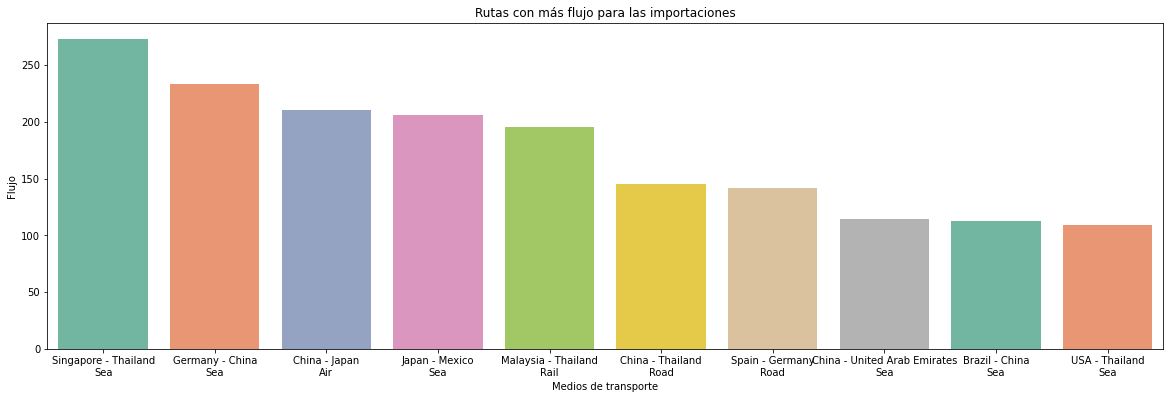

In [25]:
# Define el ancho y altura de la figura
pyplot.figure(figsize=(20,6))

# Añade un título
pyplot.title("Rutas con más flujo para las importaciones")

# Gráfica de barras que muestra la utilización de los medios de transporte para  importaciones y expoortaciones.
plot = sns.barplot(data=rutasImportaciones, x='route', y='count',  palette="Set2")

# Añade etiquetas a la gráfica
plot.set(xlabel='Medios de transporte', ylabel='Flujo')

# Muestra la gráfica 
pyplot.show()

Y gráficamos los datos de las rutas con más flujo para las exportaciones.

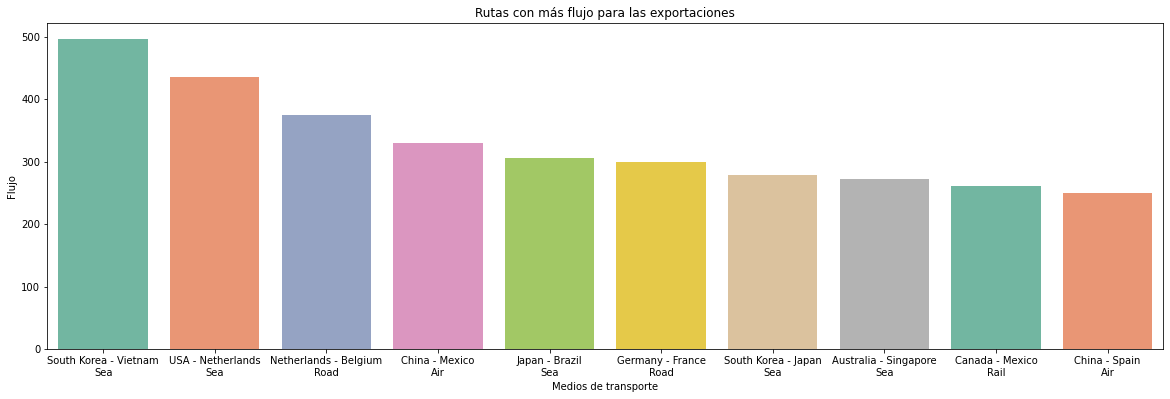

In [26]:
# Define el ancho y altura de la figura
pyplot.figure(figsize=(20,6))

# Añade un título
pyplot.title("Rutas con más flujo para las exportaciones")

# Gráfica de barras que muestra la utilización de los medios de transporte para  importaciones y expoortaciones.
plot = sns.barplot(data=rutasExportaciones, x='route', y='count',  palette="Set2")

# Añade etiquetas a la gráfica
plot.set(xlabel='Medios de transporte', ylabel='Flujo')

# Muestra la gráfica 
pyplot.show()

### Análisis
**¿Le conviene a la empresa centrarse en las 10 rutas más demandadas?**

La respuesta es no, ya que tanto las rutas de importaciones como las de exportaciones varian mucho de la región del mundo en la cuál se encuentran, así que no sería una inversión muy inteligente tratar de cubrir solo estas rutas. Lo inteligente sería seguir distribuyendo sus esfuerzos de forma equitativa para por todo el mundo.

También otro factor por el cual no es viable la estrategía, es por que varían mucho también los metódos de transporte que se utlizan para las rutas. 

## 2. Medio de transporte utilizado

En este punto, se nos solicita identificar los 3 medios de transporte más importantes para la empresa considerando el valor de las importaciones y exportaciones, esto con el fin de identificar los medios de transporte que se puden reducir.

Comprendiendo la solicitud comenzamos por crear un nuevo DataFrame, el cual vamos a tomar de nuestro conjunto de datos original.
Del conjunto original vamos a tomar la columna `direction`, `transport_mode` y `total_value`, para después en el nuevo DataFarme agrupar los datos por `direction`, para vetificar si se trata de una importación o una exportación y también agrupamos por `transport_mode` para identificar el medio de transporte. Adenás de lo anterior, usamos la función `value_counts()`, para contar `total_value`, que es el valor que aportan las exportaciones o importaciones, según sea el caso.

In [34]:
# Crea mos nuevo DataFrame tomando 'direction', 'transport_mode' y 'total_value' del conjunto de datos original
medioTransporteValor = synergyDataFrame[['direction', 'transport_mode', 'total_value']] 


# Calculamos el valor total por cada medio de transporte para las importaciones y exportaciones
medioTransporteValor = medioTransporteValor.groupby(['direction','transport_mode']).sum()

# Visualizamos los datos
medioTransporteValor

total_value
direction transport_mode             
Exports   Air             32785147000
          Rail            34505043000
          Road            27280486000
          Sea             65592622000
Imports   Air              5477000000
          Rail             9123000000
          Road             5990000000
          Sea             34938000000

Ahora vamos a separar los medios de transporte por importacions y exportaciones.

In [37]:
# Toma el valor de los medios de transporte para las exportaciones 
medioTransporteExportaciones =  medioTransporteValor.xs('Exports')

# Toma el valor de los medios de transporte para las importaciones
medioTransporteImportaciones =  medioTransporteValor.xs('Imports')

# Visualizamos los datos
medioTransporteImportaciones

,total_value
transport_mode,
Air,5477000000
Rail,9123000000
Road,5990000000
Sea,34938000000


Graficamos el valor de los medios de transporte para las **importaciones**.

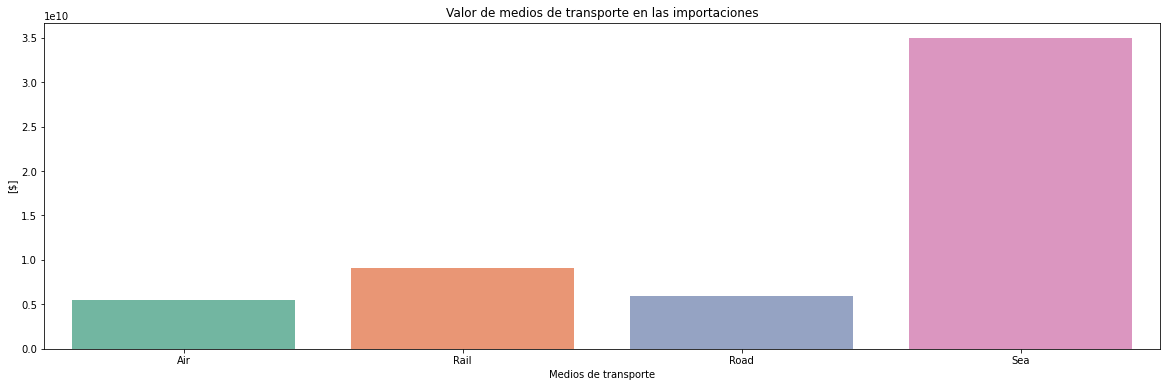

In [44]:
# Define el ancho y altura de la figura
pyplot.figure(figsize=(20,6))

# Añade un título
pyplot.title("Valor de medios de transporte en las importaciones")

# Gráfica de barras que muestra la utilización de los medios de transporte para  importaciones y expoortaciones.
plot = sns.barplot(data=medioTransporteImportaciones, x=medioTransporteImportaciones.index, y='total_value',  palette="Set2")

# Añade etiquetas a la gráfica
plot.set(xlabel='Medios de transporte', ylabel='[$]')

# Muestra la gráfica 
pyplot.show()

Graficamos el valor de los medios de transporte para las **exportaciones**.

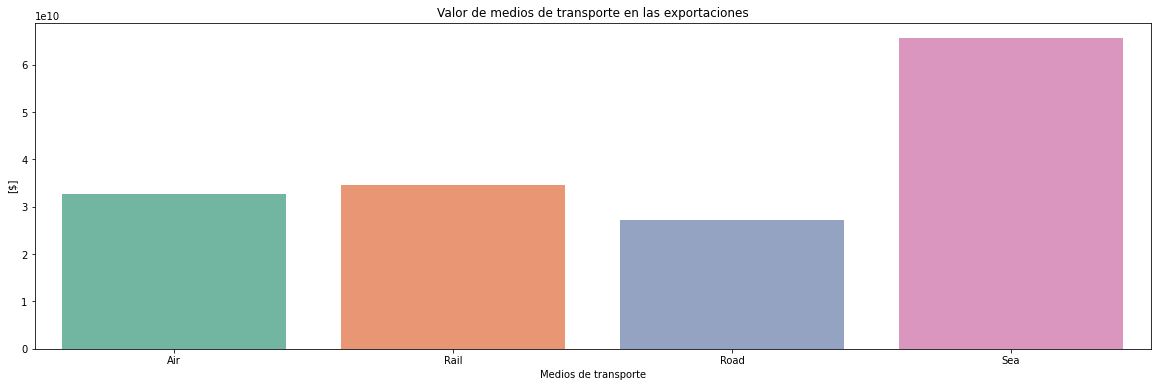

In [43]:
# Define el ancho y altura de la figura
pyplot.figure(figsize=(20,6))

# Añade un título
pyplot.title("Valor de medios de transporte en las exportaciones")

# Gráfica de barras que muestra la utilización de los medios de transporte para  importaciones y expoortaciones.
plot = sns.barplot(data=medioTransporteExportaciones, x=medioTransporteExportaciones.index, y='total_value',  palette="Set2")

# Añade etiquetas a la gráfica
plot.set(xlabel='Medios de transporte', ylabel='[$]')

# Muestra la gráfica 
pyplot.show()

### Análisis

**¿Cuál es medio de transporte que podría reducir?**

Tanto las gráfica de importaciones y exportaciones nos indica que el medio **Sea** es el que tiene más valor entre todos, y seguido de este **Rail**.

Sin emmbargo **Air** y **Road** varían en los dos últimos lugares.

**Los medios más importantes para *Synergy logistics* considerando el valor de las  importaciones son:**
1. Sea.
2. Rail.
3. Road.

**Los medios más importantes para *Synergy logistics* considerando el valor de las  exportaciones son:**
1. Sea.
2. Rail.
3. Air.

La empresa podría enfocarse en **Sea** rotundamente, ya que es el que en ambos casos aporta más valor, respecto a  **Rail** es el segundo medio con más valor en ambos casos, pero es que no tienen mucha variación con respecto a los otros medios de transporte, por lo que no sería muy conveniente enfocarse en elguno de los restantes.

Además, otro dato a considerar, es que **Sea** se encuentra en mayor medida en las rutas de importaciones y exportaciones del listado de las 10 ruta scon más flujo.

## 3. Valor total de importaciones y exportaciones

Para este punto se nos solicita identificr los países que generan el 80% del valor de las importaciones y exportaciones.

En el caso de nuestro conjunto de datos contamos con dos paises el `origin` y el `destination`, pero para el análisis vamos a contemplar el `destination` ya que es el país donde cae el valor de la opración.

Para empezar el análisis, comenzamos creando un nuevo DataFrame, el cual contendrá `direction`, `destination` y `total_value`.

`direction` servirá para distinguir entre importaciones y exportaciones, `destination` nos permitirá distinguir entre paises y `total_value` nos dará el valor de la exportación o importación.

También agrupamos nuestro conjunto por `direction` y `destiantion`, lo cual nos permitara separar nuestro conjunto en importaciones y exportaciones.

Además ordenaremos el conjunto de forma descendente.

In [79]:
# Tomamos 'direction', 'destination', 'total_value' del conjunto de datos original
paises = synergyDataFrame[['direction', 'destination','total_value']]

# Agrupamos por exportaciones e importaciones y país
paises = paises.groupby(['direction', 'destination']).sum()

# Ordenamos el conjunto
paises = paises.sort_values(by = 'total_value',ascending = False)

# Visualizamos los datos
paises.head(10)

total_value
direction destination                      
Exports   Mexico                28315015000
Imports   Thailand              13745000000
Exports   USA                   13159409000
          Belgium               13099380000
          Germany               11303451000
          China                 11259992000
Imports   Mexico                 8894000000
Exports   Japan                  8777152000
          United Kingdom         8150673000
Imports   United Arab Emirates   7848000000

Despúes, separamos nuestro conjunto y hacemos la suma total del valor de totas las importaciones y exportaciones.

In [80]:
# Tomamos los paises con valor de Exportaciones
paisesExportaciones = paises.xs('Exports')

# Calculamos el total del valor de Exportaciones
totalExportaciones = paisesExportaciones['total_value'].sum()

# Tomamos los paises con valor de Exportaciones
paisesImportaciones = paises.xs('Imports')

# Calculamos el total del valor de Importaciones
totalImportaciones = paisesImportaciones['total_value'].sum()

# Visualizamos los datos
paisesImportaciones

,total_value
destination,
Thailand,13745000000
Mexico,8894000000
United Arab Emirates,7848000000
Japan,5828000000
Germany,5109000000
USA,3758000000
India,3018000000
China,2572000000
Poland,2188000000


Seguido de esto, calculamos el porcentaje que le corresponde a cada país del valor de las importaciones y exportaciones y este lo guardamos en la columna `percentaje`.*

In [81]:
# Se calcula el porcentaje correspondiente a cada país del valor de las Exportaciones
paisesExportaciones['percentage'] = paisesExportaciones['total_value'].apply(lambda x: x/totalExportaciones*100)

# Se calcula el porcentaj correspondiente a cada país del valor de las Importaciones
paisesImportaciones['percentage'] = paisesImportaciones['total_value'].apply(lambda x: x/totalImportaciones*100)

# Visualización de datos
paisesImportaciones

,total_value,percentage
destination,,
Thailand,13745000000,24.753278
Mexico,8894000000,16.017145
United Arab Emirates,7848000000,14.133410
Japan,5828000000,10.495606
Germany,5109000000,9.200764
USA,3758000000,6.767757
India,3018000000,5.435096
China,2572000000,4.631897
Poland,2188000000,3.940354


Para el caso de las **exportaciones**, vemos que la lista de los 12 primeros paises nos entregan el **79%** del valor total.

In [106]:
# Suma del porcentaje del valor total de los 12 primeros paises para las Exportaciones
paisesExportaciones['percentage'][0:12].sum()

79.80310382969262

Vemos la lista de paises

In [105]:
paisesExportaciones[0:12]

,total_value,percentage
destination,,
Mexico,28315015000,17.678841
USA,13159409000,8.216245
Belgium,13099380000,8.178765
Germany,11303451000,7.057454
China,11259992000,7.030320
Japan,8777152000,5.480127
United Kingdom,8150673000,5.088977
Brazil,7508016000,4.687726
South Korea,7321668000,4.571377


Para el caso de las **importaciones**, vemos que la lista de los 5 primeros paises nos entregan el 74% del valor total.

In [109]:
# Suma del porcentaje del valor total de los 5 primeros paises para las Importaciones
paisesImportaciones['percentage'][0:5].sum()

74.60020170004321

Vemos la lista de paises.

In [110]:
paisesImportaciones[0:5]

,total_value,percentage
destination,,
Thailand,13745000000,24.753278
Mexico,8894000000,16.017145
United Arab Emirates,7848000000,14.133410
Japan,5828000000,10.495606
Germany,5109000000,9.200764


### Análisis

**¿En qué grupo de países debería enfocar sus esfuerzos?**

Para el caso de las **importaciones** vemos que tanto **México**, **USA**, **Belgica** y **Alemania** aportan más del **30%** de el valor, por lo que la empresa podría centrase en ese grupo.

Por otro lado, en las exportaciones tenemos a **Tailandia**, **México**, **Emiratos Arabes**, y **Japón** quienes aportan cerca del **64%** del valor, por lo que centrarse en este grupo de 4 paises ya aportaría más la mitan del valor. Sin embargo, si también se incluye a **Alemania** al listado, ya se tendría más del **70%** del valor.

 ## 4. Conclusiones

Podemos concluir que con el desarrollo del proyecto cumplimos con el objetivo de poner a prueba los conocimientos de python adquirios durante el curso, además de ir más allá de el scope del curso ya que también utlizamos paquetes como pandas o seaborn.

En lo personal puedo decir que este curso me nutrió mucho en cuanto a conocimientos técnicos y personales los cuales me ayudarán a alcanzar mis metas a futuro.

Sin más, agraezco la oportunidad de participar en el programa y aplaudir el esfuerzo de quienes lo hicieron posible.